# 1. 이미지 처리 기초
여기에서는 이미지 데이터를 표현하는 방식과 이미지 데이터를 처리하기 위한 파이썬 패키지인 Pillow, Scikit-Image,OpenCV 패키지에 대해 설면한다.
# 픽셀
이미지 데이터는 픽셀(pixel)이라고 하는 작은 이미지를 직사각형 형태로 모은 것이다. 각 픽셀은 단색의 직사각형이다. 전체 이미지의 크기를 표현할 떄는 (세로픽셀수 x가로 픽셀수)형식으로 표현한다.<br>
이미지 데이터를 저장할 떄는 픽셀의 색을 표현하는 스칼라 값이나 백터를 2차원 배열로 표현한다. 파이썬에서는 NumPy의 ndarray 클래스 배열로 표현한다.
# 색공간
픽셀의 색을 숫자로 표현하는 방식을 색공간(color space)라고 한다. 대표적인 색공간으로는 그레이스케일(grayscale),RGB(Red-Green-Blue), HSV(Hue-Saturation-Value)방식이 있다.

## 1.1 그레이스케일
그레이스케일에서는 모든 색이 흑백이다. 각 픽셀은 명도를 나타내는 숫자로 표현된다. 0은 검은색을 나타내고 숫자가 커질수록 명도가 증가하여 하얀색이 된다. 숫자는 보통 0 ~ 255의 8비트 부호없는 정수로 저장된다.<br>
SciPy 패키지의 misc 서브 패지의 face 명령은 이미지 처리용 샘플 이미지를 제공한다. 인수로 gray=True를 입력하면 그레이스케일 이미지를 반환한다. 이미지의 크기는 배열의 shape 속성으로 볼 수 있다.

In [1]:
import scipy as sp

In [2]:
import scipy.misc 
img_gray = sp.misc.face(gray=True)
img_gray.shape

(768, 1024)

이 이미지 데이터는 768x1024 크기의 uint8  자료형 2차원 배열이다. 좌측 상단의 25개 픽셀의 데이터만 보면 다음과 같다.

In [3]:
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
import matplotlib as mpl
# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')
# 한글폰트
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system... sorry~~~~')

Linux version


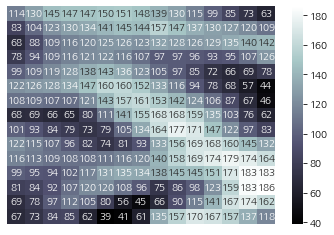

In [5]:
sns.heatmap(img_gray[:15,:15], annot=True, fmt="d", cmap=plt.cm.bone)
plt.axis("off")
plt.show()

## 1.2 RGB
RGB 색공간에서 색은 적(Red),녹(Green),청(Blue)의 3가지 색의 명도를 뜻하는 숫자 3개가 합쳐진 벡터로 표현된다. 8비트 부호없는 정수를 사용하는 경우(255,0,0)은 빨간색,(0,255,0)은 녹색, (0,0,255)는 파란색이다. <br>
픽셀 데이터가 스칼라가 아닌 벡터이므로 이미지 데이터(세로픽셀수 x 가로픽셀수) 형태의 2차원 배열로 표현하지 못하고(세로픽셀수 x 가로픽셀수 x 색채널) 형태의 3차원 배열로 저장한다. 세번째 축을 색채널(channel)이라고 부른다.

In [6]:
from sklearn.datasets import load_sample_images
dataset = load_sample_images()
img_rgb = dataset.images[1]
img_rgb.shape

(427, 640, 3)

다음 그림에서 붉은 기와는 R채널의 값이 크고 하늘은 푸른색이므로 B채널의 값이 큰것을 확인할 수 있다.

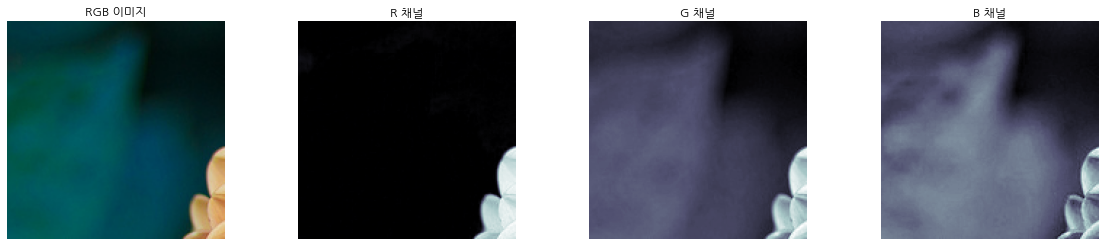

In [7]:
plt.figure(figsize=(20,4))

plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB 이미지")

plt.subplot(142)
plt.imshow(img_rgb[50:200, 50:200, 0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R 채널")

plt.subplot(143)
plt.imshow(img_rgb[50:200, 50:200, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G 채널")

plt.subplot(144)
plt.imshow(img_rgb[50:200, 50:200, 2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B 채널")

plt.show()

# HSV
HSV(Hue, Saturation, Value) 색공간에서는 색이 다음 세가지 값으로 표현된다.
- 색상(Hue) : 색상값 H는 가시광선 스펙트럼을 주파수 별로 고리모양으로 배치했을 때의 각도이다. 0도 ~ 360도의 범위를 갖고 360도와 0도는 빨강을 가리킨다.
- 채도(Saturation) : 채도값 S는 특정한 색상의 진함을 정도를 나타낸다. 가장 진한 상태를 100%이고 0%는 같은 명도의 무채색이다.
- 명도(Value) : 명도값 V는 밝은 정도를 나타낸다. 순수한 흰색, 빨간색은 100%이고 검은색은 0%이다. 

아래 코드는 채도가 100일 때의 색공간을 시각화 한 것이다.

In [12]:
from matplotlib.colors import hsv_to_rgb
import numpy as np

In [13]:
V, H = np.mgrid[0:1:100j, 0:1:360j]
S = np.ones_like(V)

HSV_S100 = np.dstack((H, S * 1.0, V)) 
RGB_S100 = hsv_to_rgb(HSV_S100)
HSV_S20 = np.dstack((H, S * 0.2, V))
RGB_S20 = hsv_to_rgb(HSV_S20)

HSV_S20.shape

(100, 360, 3)

In [14]:
# 색상(Hue)
HSV_S20[:4, :5, 0]

array([[0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206]])

In [15]:
# 채도(Saturation)
HSV_S20[:4, :5, 1]

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [16]:
# 명도(Value)
HSV_S20[:4, :5, 2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101],
       [0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202],
       [0.03030303, 0.03030303, 0.03030303, 0.03030303, 0.03030303]])

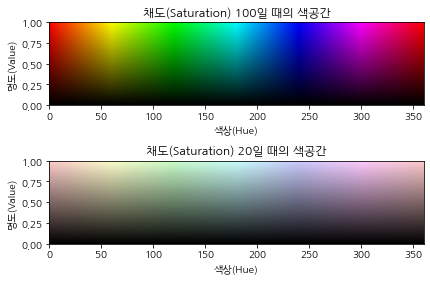

In [17]:
plt.subplot(211)
plt.imshow(RGB_S100, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 100일 때의 색공간")
plt.grid(False)

plt.subplot(212)
plt.imshow(RGB_S20, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 20일 때의 색공간")
plt.grid(False)

plt.tight_layout()
plt.show()

matplotlib 패키지의 rgb_to_hsv, hsv_to_rgb 명령을 사용하면 RGB 색공간 표현과 HSV 색공간 표현을 상호변환할 수 있다.<br>
HSV 색공간으로 표현된 파일은 imshow 명령으로 바로 볼 수 없다. 이외에도 RGB,HSV 색공간에 투명도(transparency)를 표현하는 A(Alpha) 채널이 추가된 RGBA,HSVA등의 생공간도 있다.